**FACTORES QUE INFLUYEN EN EL "AMOR A PRIMERA VISTA"**

Esta base de datos fue compilada luego de un experimento realizado en una Universidad por profesores de una de las cátedras de Psicología. El experimento buscaba analizar posibles diferencias entre géneros en la selección de una pareja.
Previo al experimento, se pidió a los participantes que puntuaran (del 1 al 10) la importancia de los siguientes atributos en la elección de una pareja:

1. Apariencia
2. Sinceridad
3. Inteligencia
4. Diversión
5. Ambición
6. Existencia de intereses compartidos

Durante el experimento, los distintos participantes asistieron a una cita de 4 minutos con otro participante del sexo opuesto. Luego de transcurridos los 4 minutos, se le realizaron una serie de preguntas a los participantes.
Finalizado el mismo, se pidió a los participantes que asignen un puntaje a su cita dada la serie de atributos mencionados anteriormente, si consideraban que su cita asignada les había gustado, y si la conocían previamente.

A partir de este experimento de citas surgen los siguientes interrogantes:
1) ¿Cuáles son las cualidades más importantes que influyen en la búsqueda de una pareja?
2) ¿Son las mismas cualidades las que interesan a hombres y mujeres?
3) ¿Es significativamente más importante la belleza externa en la primera cita? ¿Difiere esto entre géneros?
4) ¿Influye la edad de los participantes en la posibilidad de hacer “match” con una pareja? ¿Difiere esto entre hombres y mujeres?


Las hipótesis que se plantean son las siguientes:
1) Las cualidades que interesan a hombres y mujeres no son las mismas.
2) La belleza externa es importante en la primera cita, independientemente del género.
3) La edad influye en la posibilidad de hacer "match". Las personas de menor edad tienen mayor probabilidad de hacer “match” debido a que su menor experiencia de vida los hace menos exigentes a la hora de volver a salir con alguien.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = 'https://raw.githubusercontent.com/antodpadula/DataScienceI/main/datoscitas.csv'
dating_data = pd.read_csv(url, sep=';')
dating_data.head()

,ID_participante,Gender,Age,Income,Goal,Career,Decision,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
0,1,Female,21.0,69487.0,2.0,lawyer,Match,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,2,Female,21.0,69487.0,2.0,lawyer,Match,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,3,Female,21.0,69487.0,2.0,lawyer,Match,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,4,Female,21.0,69487.0,2.0,lawyer,Match,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,5,Female,21.0,69487.0,2.0,lawyer,Match,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


In [ ]:
dating_data.shape

(8378, 16)

El **dataset** está compuesto por **16 columnas**, las cuales se describen a continuación:
1. **ID_participante**: es el número del participante
2. **Gender:** es el género del participante, el cual se encuentra codificado como: 0 = mujer, 1 = hombre.
2. **Age:** edad del participante
3. **Income:** salario anual del participante
4. **Goal:** le preguntan al participante que es lo más importante que tiene que tener la otra persona, y le hacen elegir entre los atributos del 8 al 13
5. **Career:** es la profesión del participante
6. **Decision:** es la decisión del participante respecto a si le gustó la otra persona o no, se encuentra codificado como: 0 = No Match; 1 = Match.
7. **Attractiveness:** puntuación que le da el participante a su cita, respecto a cuán atractiva fue. Los valores van del 1 al 10.
8. **Sincerity:** puntuación que le da el participante a su cita, respecto a cuán sincera fue. Los valores van del 1 al 10.
9. **Intelligence:**	puntuación que le da el participante a su cita, respecto a cuán inteligente fue. Los valores van del 1 al 10.
10. **Fun:** puntuación que le da el participante a su cita, respecto a cuán divertida fue. Los valores van del 1 al 10.
11. **Ambition:** puntuación que le da el participante a su cita, respecto a cuán ambiciosa fue. Los valores van del 1 al 10.
12. **Shared Interests:** puntuación que le da el participante a su cita, respecto a cuánto cree que tienen en común. Los valores van del 1 al 10.
13. **Like:** puntuación que le da el participante a su cita, respecto a cuánto le gustó la misma. Los valores van del 1 al 10.
14. **Probability of interest:** puntuación que le da el participante a su cita, respecto a cuál es la probabilidad de que su cita haya gustado de él. Los valores van del 1 al 10.
15. **Met Before:** indica si los participantes se conocían previamente, codificado como 1=se conocían, y 2=no se conocen.


In [ ]:
dating_data.describe()

,ID_participante,Age,Income,Goal,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
count,8378.000000,8283.000000,4279.000000,8299.000000,8147.000000,8072.000000,8053.000000,7999.000000,7637.000000,7282.000000,8109.000000,8040.000000,7974.000000
mean,4189.500000,26.358928,44887.606450,2.122063,6.187971,7.171705,7.366571,6.399675,6.778774,5.472329,6.130127,5.207525,0.951843
std,2418.664611,3.566763,17206.920962,1.407181,1.950344,1.741646,1.551680,1.954990,1.795916,2.157787,1.841129,2.131630,0.990201
min,1.000000,18.000000,8607.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.250000,24.000000,31516.000000,1.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,4189.500000,26.000000,43185.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,6283.750000,28.000000,54303.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,8378.000000,55.000000,109031.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


In [ ]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_participante          8378 non-null   int64  
 1   Gender                   8378 non-null   object 
 2   Age                      8283 non-null   float64
 3   Income                   4279 non-null   float64
 4   Goal                     8299 non-null   float64
 5   Career                   8289 non-null   object 
 6   Decision                 8349 non-null   object 
 7   Attractiveness           8147 non-null   float64
 8   Sincerity                8072 non-null   float64
 9   Intelligence             8053 non-null   float64
 10  Fun                      7999 non-null   float64
 11  Ambition                 7637 non-null   float64
 12  Shared Interests         7282 non-null   float64
 13  Like                     8109 non-null   float64
 14  Probability of interest 

**Analizamos si hay valores nulos**

In [ ]:
dating_data.isnull().sum()

ID_participante               0
Gender                        0
Age                          95
Income                     4099
Goal                         79
Career                       89
Decision                     29
Attractiveness              231
Sincerity                   306
Intelligence                325
Fun                         379
Ambition                    741
Shared Interests           1096
Like                        269
Probability of interest     338
Met Before                  404
dtype: int64

**Tratamiento de valores nulos**

Se observa una gran cantidad de valores nulos en algunas columnas, por lo que se procederá a reemplazar algunos de ellos por el valor promedio de cada una de ellas.

In [ ]:
# Reemplazamos los valores nulos en las columnas con el promedio de la columna
dating_data['Income'] = dating_data['Income'].fillna(dating_data['Income'].mean())
dating_data['Age'] = dating_data['Age'].fillna(dating_data['Age'].mean())
dating_data['Goal'] = dating_data['Goal'].fillna(dating_data['Goal'].mean())
dating_data['Attractiveness'] = dating_data['Attractiveness'].fillna(dating_data['Attractiveness'].mean())
dating_data['Sincerity'] = dating_data['Sincerity'].fillna(dating_data['Sincerity'].mean())
dating_data['Intelligence'] = dating_data['Intelligence'].fillna(dating_data['Intelligence'].mean())
dating_data['Fun'] = dating_data['Fun'].fillna(dating_data['Fun'].mean())
dating_data['Ambition'] = dating_data['Ambition'].fillna(dating_data['Ambition'].mean())
dating_data['Shared Interests'] = dating_data['Shared Interests'].fillna(dating_data['Shared Interests'].mean())

In [ ]:
#En el caso de la columna "Decision", se decide eliminar los valores nulos
dating_data = dating_data.dropna(subset=['Decision'])

In [ ]:
#Analizamos si los valores fueron reemplazados
dating_data.isnull().sum()

ID_participante              0
Gender                       0
Age                          0
Income                       0
Goal                         0
Career                      89
Decision                     0
Attractiveness               0
Sincerity                    0
Intelligence                 0
Fun                          0
Ambition                     0
Shared Interests             0
Like                       240
Probability of interest    309
Met Before                 375
dtype: int64

**Analizamos algunas métricas**

In [ ]:
edad_promedio = np.mean(dating_data['Age']) #Mediana de la edad de los participantes
print(edad_promedio)

edad_minima = np.min(dating_data['Age']) #Edad minima
print(edad_minima)

edad_maxima = np.max(dating_data['Age']) #Edad maxima
print(edad_maxima)

26.360294424822516
18.0
55.0


La edad de los participantes tiene un rango entre 18 y 55 años de edad, siendo el promedio de edad de los mismos 26 años.

GRÁFICOS CON **Matplotlib**

**Analizamos la distribución de edad de las participantes mujeres**

Text(0.5, 1.0, 'Histograma de Edad de los participantes mujeres')

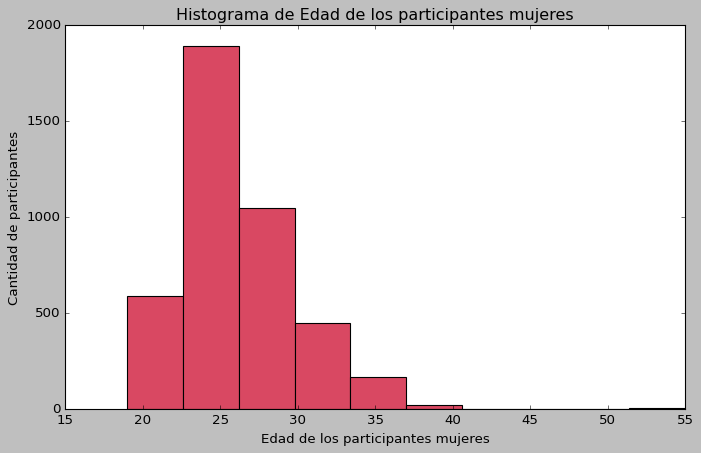

In [ ]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= dating_data[dating_data['Gender']== 'Female']['Age'], bins=None, density=False, orientation='vertical', color="#D94862", edgecolor="black")
ax.set_xlabel('Edad de los participantes mujeres')
ax.set_ylabel('Cantidad de participantes')
ax.set_title('Histograma de Edad de los participantes mujeres')

La mayor cantidad de participantes mujeres rondan los 25 años de edad.

**Analizamos la distribución de edad de los participantes hombres**

Text(0.5, 1.0, 'Histograma de Edad de los participantes hombres')

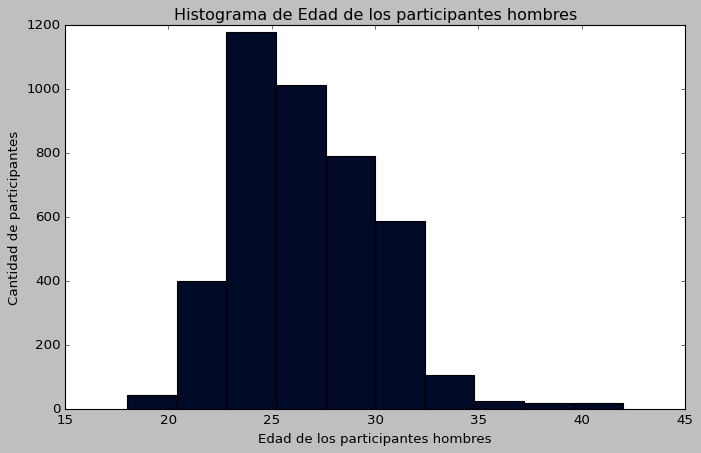

In [ ]:
mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= dating_data[dating_data['Gender']== 'Male']['Age'], bins=None, density=False, orientation='vertical', color="#010A26", edgecolor="black")
ax.set_xlabel('Edad de los participantes hombres')
ax.set_ylabel('Cantidad de participantes')
ax.set_title('Histograma de Edad de los participantes hombres')

La mayor parte de los participantes hombres tambien rondan los 25 años de edad.

**Analizamos si hay una relación entre el salario y la edad de los participantes**

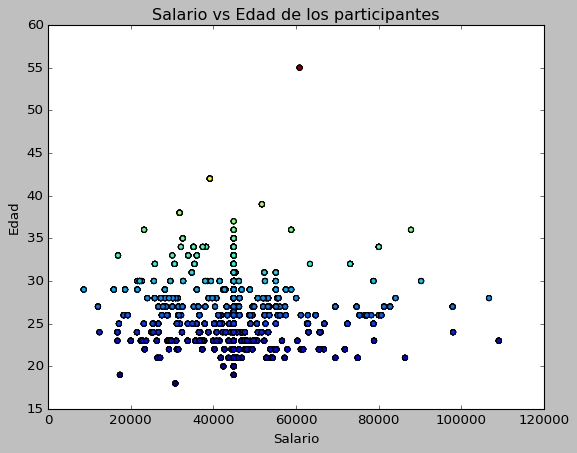

In [ ]:
plt.scatter(dating_data['Income'], dating_data['Age'], c=dating_data['Age'])
plt.xlabel('Salario')
plt.ylabel('Edad')
_ = plt.title('Salario vs Edad de los participantes')

No pareciera observarse una relación entre el salario y la edad de los participantes. Se observa un outlier, al parecer una persona de 55 años con un salario muy por encima del promedio de su edad.

GRÁFICOS CON **Seaborn**

**Analizamos la cantidad de participantes por género**

<ipython-input-15-5f7206d6bde5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = "Gender", data = dating_data, palette='Pastel1')


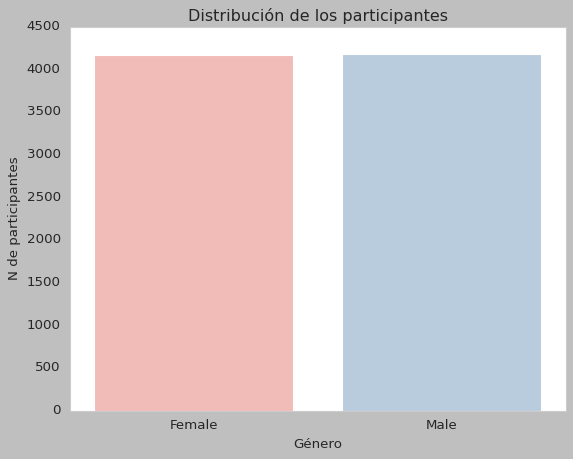

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes
sns.set_style("whitegrid", {'grid.color': 'white'})
ax = sns.countplot(x = "Gender", data = dating_data, palette='Pastel1')
plt.title('Distribución de los participantes')
plt.xlabel('Género')
plt.ylabel('N de participantes')
plt.show()



La cantidad de participantes se distribuye equitativamente entre hombres y mujeres.

**Analizamos los participantes que hicieron y no hicieron "match" con su cita según su género.**

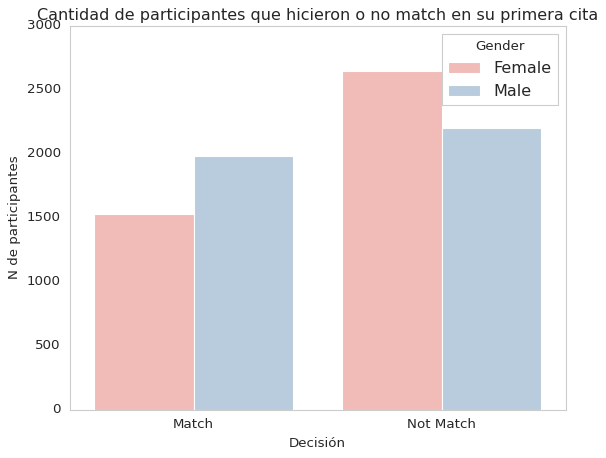

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes
sns.set_style("whitegrid", {'grid.color': 'white'})
ax = sns.countplot(x = "Decision", data = dating_data, hue="Gender", legend=True, palette="Pastel1")
plt.title('Cantidad de participantes que hicieron o no match en su primera cita')
plt.xlabel('Decisión')
plt.ylabel('N de participantes')
plt.show()

Hay una mayor cantidad de participantes hombres que hicieron "match" con su cita respecto a la cantidad de mujeres.

**Analizamos la distribución de edades de los participantes indistintamente de su género.**

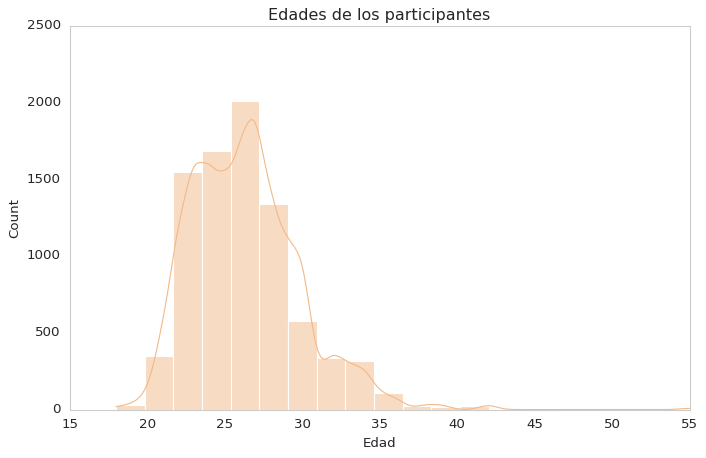

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.histplot(dating_data['Age'].dropna(), bins=20, kde=True, color='#F2B988')
plt.title('Edades de los participantes')
plt.xlabel('Edad')
plt.ylabel('Count')
plt.show()

La mayor cantidad de participantes se encuentra entre los 20 y 30 años de edad.

**Analizamos la gran diversidad de profesiones de los participantes.**

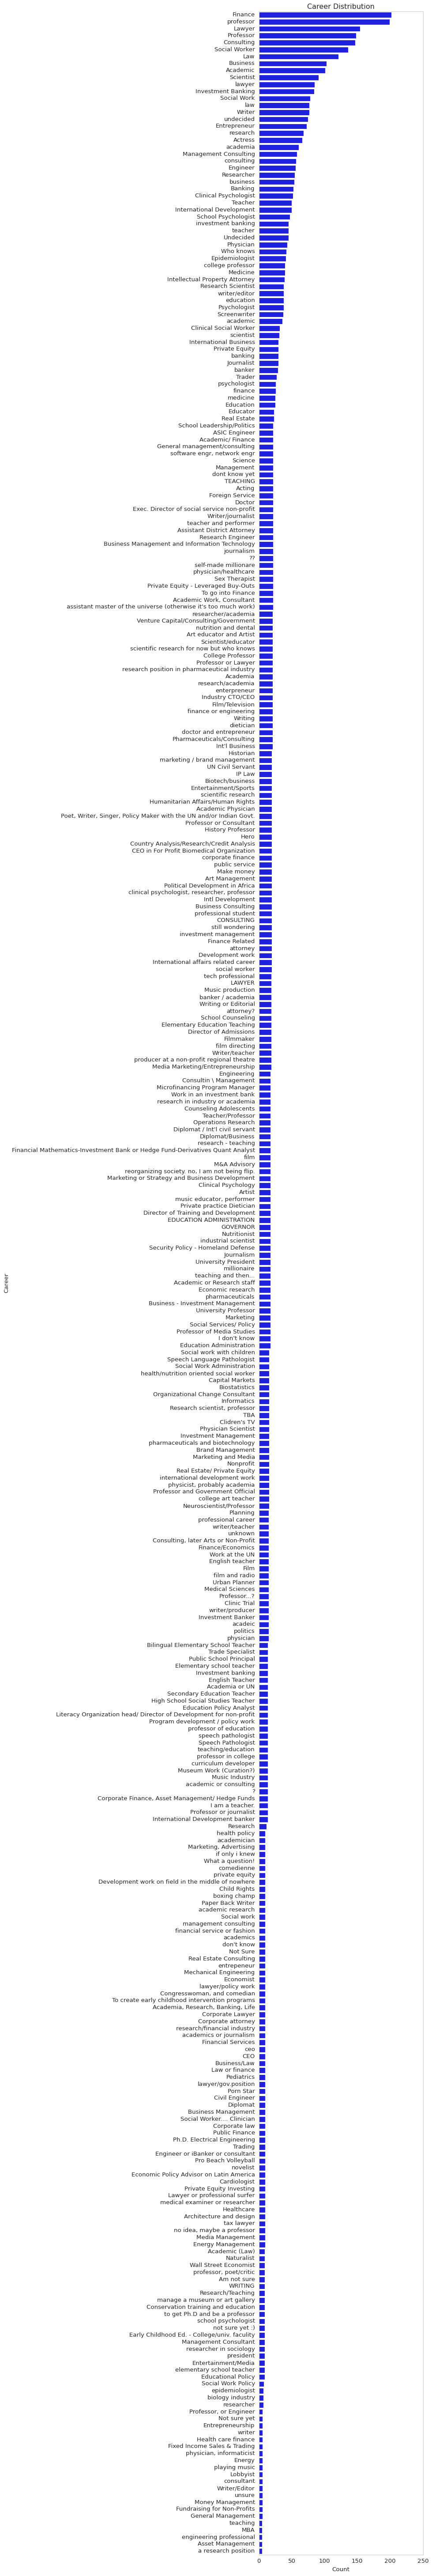

In [ ]:
plt.figure(figsize=(6, 90))
sns.countplot(y='Career', data=dating_data, order=dating_data['Career'].value_counts().index)
plt.title('Career Distribution')
plt.xlabel('Count')
plt.ylabel('Career')
plt.show()

**ANALIZAMOS LAS PREGUNTAS PLANTEADAS PARA EL PRESENTE ESTUDIO..**

**1) CUÁL ES LA CUALIDAD MÁS IMPORTANTE QUE INFLUYE EN LA BÚSQUEDA DE UNA PAREJA?**

Para responder esta pregunta se realizó un gráfico de barras con la columna "Goal" que indica cuál de todas las cualidades mencionadas previamente es la más importante para cada participante.

La hipótesis planteada es la siguiente:

*La belleza externa es lo más importante en la primera cita, independientemente del género del participante.*

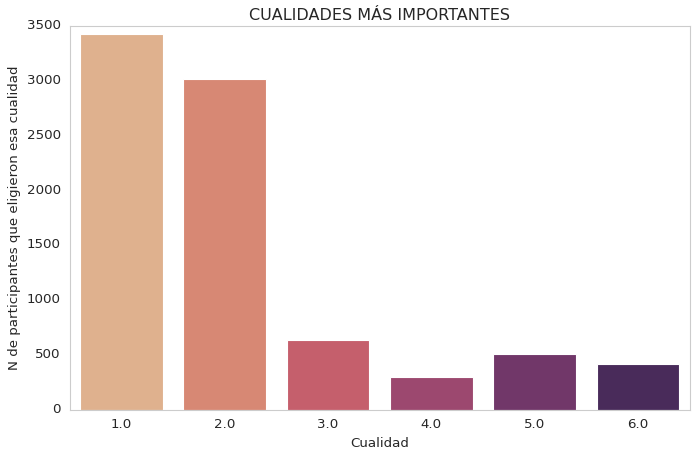

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.countplot(x='Goal', data=dating_data, hue="Goal", legend=False, palette= "flare")
plt.title('CUALIDADES MÁS IMPORTANTES')
plt.xlabel('Cualidad')
plt.ylabel('N de participantes que eligieron esa cualidad')
plt.show()

Debido a que en este dataframe las cualidades están representadas con números en vez de con palabras, se procede a agregar realizar algunos cambios que permitan que la lectura del gráfico sea más amigable.

In [ ]:
# Crear un diccionario de mapeo de números a cualidades
mapeo_cualidades = {
    1.0: 'Apariencia',
    2.0: 'Sinceridad',
    3.0: 'Inteligencia',
    4.0: 'Diversión',
    5.0: 'Ambición',
    6.0: 'Intereses',
}

# Reemplazar los números por las cualidades en la columna 'Goal'
dating_data['Goal'] = dating_data['Goal'].replace(mapeo_cualidades)

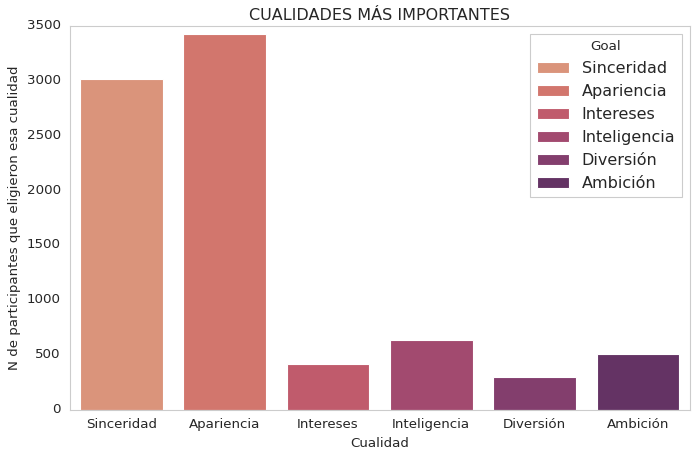

In [ ]:
#Graficamos nuevamente
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.countplot(x='Goal', data=dating_data, hue="Goal", legend=True, palette= "flare")
plt.title('CUALIDADES MÁS IMPORTANTES')
plt.xlabel('Cualidad')
plt.ylabel('N de participantes que eligieron esa cualidad')
plt.show()

Se observa que, sin considerar el género de los participantes, la cualidad que más influye en la elección de una pareja en la primera cita es la "apariencia", es decir, la belleza externa de la otra persona. La segunda cualidad más importante es la sinceridad. El resto de las cualidades parecen tener una importancia relativamente similar entre ellas para los participantes.

**2) SON LAS MISMAS CUALIDADES LAS QUE BUSCAN HOMBRES Y MUJERES?**

La hipótesis es la siguiente:

*Las cualidades que interesan a hombres y mujeres no son las mismas.*

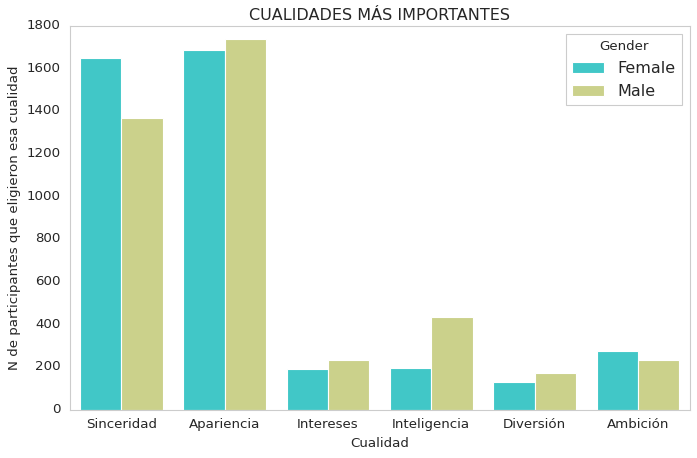

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.countplot(x='Goal', data=dating_data, hue='Gender', palette= "rainbow", legend=True)
plt.title('CUALIDADES MÁS IMPORTANTES')
plt.xlabel('Cualidad')
plt.ylabel('N de participantes que eligieron esa cualidad')
plt.show()

Se observa que considerando el género de los participantes, los intereses de los participantes resultan también similares. Tanto hombres como mujeres consideran que lo más importante en una primera cita es la apariencia de su cita, y en segundo lugar la sinceridad. En el resto de las cualidades la importancia parece distribuirse equitativamente, con excepción de la 3er cualidad: "Inteligencia". En este caso, se observa una diferencia entre géneros: para los hombres resulta más importante esta cualidad que para las mujeres.

**3) ¿ INFLUYE LA EDAD DE LOS PARTICIPANTES EN LA POSIBILIDAD DE HACER "MATCH" CON UNA PAREJA? ¿ DIFIERE ÉSTO ENTRE HOMBRES Y MUJERES?**

Text(0, 0.5, 'Edad')

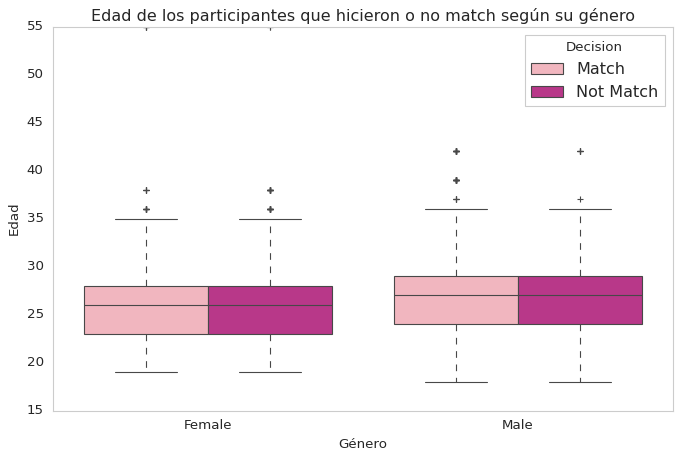

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid", {'grid.color': 'white'})
sns.boxplot(x=dating_data.Gender, y= dating_data.Age, hue=dating_data.Decision, palette="RdPu")
plt.title('Edad de los participantes que hicieron o no match según su género')
plt.xlabel('Género')
plt.ylabel('Edad')

Se observa que la edad parece no influir en la posibilidad de hacer "match" con una pareja en la primera cita. No se observan diferencias entre las edades de los participantes de cada género. Respecto a la posibilidad de hacer "match" con una pareja, en el caso de los que sí lo hicieron parece ser que la mediana de la edad es levemente más alta.

**CONCLUSIÓN**

La belleza externa es la cualidad más importante que influye en la búsqueda de una pareja, independientemente de su género. Al considerar el género de los participantes, ambos coinciden en que lo más importante es la apariencia, seguido de la sinceridad. No obstante, en el caso de la apariencia, hay una mayor cantidad de hombres que la consideran más importante respecto a las mujeres, mientras que en el caso de la sinceridad, las mujeres la consideran más importante que los hombres. Por último, la edad no influye en la posibilidad de hacer "match" ni difiere entre géneros.

# **Proyecto Final: Predicción de la probabilidad de hacer "match" con una pareja**

# **Objetivo**

El objetivo de este trabajo es plantear un modelo que permita predecir si un candidato va a hacer "match" o no con su pareja en la primera cita a partir de la importancia que cada uno de los candidatos le otorga a cada una de las siguientes cualidades en la búsqueda de una pareja: apariencia, sinceridad, inteligencia, diversión, ambición e intereses compartidos.



# **Contexto comercial**

Como científica de datos de una empresa, fui contratada por el equipo de Tinder, la aplicación de citas, quien busca mejorar el algoritmo de recomendación de parejas. En los últimos años, esta empresa ha tenido poco éxito en la recomendación de parejas, por lo que ha bajado su cantidad de suscriptores. El equipo sospecha que la baja tasa de éxito se debe principalmente a una poca compatibilidad de determinadas características.
Por lo tanto, ha decidido realizar un experimento de citas similar al realizado en la Universidad, con el fin de crear un algoritmo que anticipe a los suscriptores su probabilidad de hacer "match" en base a las características de interés de cada uno. En base a esto, la aplicación ofrecería asesoría para mejorar cada una de esas características y aumentar las chances de emparejamiento.





# **Problema empresarial**

El equipo de Tinder se pregunta: Cuáles son las características que llevan a tener una mayor probabilidad de hacer "match" con una pareja?

# **Contexto analítico**

Como la científica de datos contratada para esta tarea, el departamento de recursos humanos me ha proporcionado una base de datos de suscriptores que contiene información sobre varios atributos y la importancia que ellos le dan a los mismos en la búsqueda de una pareja.

Para llevar a cabo esta tarea se utilizó, dentro del tipo de aprendizaje supervisado, el **modelo de regresión logística**, debido a que este modelo se utiliza para determinar si una variable independiente tiene efecto sobre una variable dependiente binaria, en la que sólo hay 2 resultados posibles. En este caso, la variable independiente serían las cualidades que a un candidato le interesan más, y la variable dependiente sería la decisión de hacer o no hacer "match".

# **Exploración de datos (EDA)**

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
url = 'https://raw.githubusercontent.com/antodpadula/DataScienceI/main/datoscitas.csv'
dating_data = pd.read_csv(url, sep=';')
dating_data.head()

,ID_participante,Gender,Age,Income,Goal,Career,Decision,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
0,1,Female,21.0,69487.0,2.0,lawyer,Match,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,2,Female,21.0,69487.0,2.0,lawyer,Match,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,3,Female,21.0,69487.0,2.0,lawyer,Match,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,4,Female,21.0,69487.0,2.0,lawyer,Match,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,5,Female,21.0,69487.0,2.0,lawyer,Match,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


In [27]:
dating_data.shape

(8378, 16)

In [28]:
dating_data.describe()

,ID_participante,Age,Income,Goal,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
count,8378.000000,8283.000000,4279.000000,8299.000000,8147.000000,8072.000000,8053.000000,7999.000000,7637.000000,7282.000000,8109.000000,8040.000000,7974.000000
mean,4189.500000,26.358928,44887.606450,2.122063,6.187971,7.171705,7.366571,6.399675,6.778774,5.472329,6.130127,5.207525,0.951843
std,2418.664611,3.566763,17206.920962,1.407181,1.950344,1.741646,1.551680,1.954990,1.795916,2.157787,1.841129,2.131630,0.990201
min,1.000000,18.000000,8607.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.250000,24.000000,31516.000000,1.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,5.000000,4.000000,0.000000
50%,4189.500000,26.000000,43185.000000,2.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.000000,5.000000,0.000000
75%,6283.750000,28.000000,54303.000000,2.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,2.000000
max,8378.000000,55.000000,109031.000000,6.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


In [29]:
dating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_participante          8378 non-null   int64  
 1   Gender                   8378 non-null   object 
 2   Age                      8283 non-null   float64
 3   Income                   4279 non-null   float64
 4   Goal                     8299 non-null   float64
 5   Career                   8289 non-null   object 
 6   Decision                 8349 non-null   object 
 7   Attractiveness           8147 non-null   float64
 8   Sincerity                8072 non-null   float64
 9   Intelligence             8053 non-null   float64
 10  Fun                      7999 non-null   float64
 11  Ambition                 7637 non-null   float64
 12  Shared Interests         7282 non-null   float64
 13  Like                     8109 non-null   float64
 14  Probability of interest 

Hacemos algunas modificaciones que nos permitirán trabajar con el modelo

In [30]:
# Por ejemplo, es necesario convertir los valores de la columna "Decision" a valores numéricos

# Entonces creamos un diccionario de mapeo
mapping = {'Not Match': 0, 'Match': 1}

# Usamos la función map para aplicar el mapeo a la columna "Decision"
dating_data['Decision'] = dating_data['Decision'].map(mapping)

# Verificamos el resultado
print(dating_data['Decision'].value_counts())  # Comprobamos las frecuencias de 0 y 1 de la columna "Decision"

Decision
0.0    4843
1.0    3506
Name: count, dtype: int64


In [31]:
# Comprobamos de otra forma que el cambio fue realizado
dating_data.head()

,ID_participante,Gender,Age,Income,Goal,Career,Decision,Attractiveness,Sincerity,Intelligence,Fun,Ambition,Shared Interests,Like,Probability of interest,Met Before
0,1,Female,21.0,69487.0,2.0,lawyer,1.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,2,Female,21.0,69487.0,2.0,lawyer,1.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,3,Female,21.0,69487.0,2.0,lawyer,1.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,4,Female,21.0,69487.0,2.0,lawyer,1.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,5,Female,21.0,69487.0,2.0,lawyer,1.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


**Analisis de valores nulos y tratamiento de los mismos**

In [32]:
#Buscamos la presencia de valores nulos para lidiar con éstos
dating_data.isnull().sum()

ID_participante               0
Gender                        0
Age                          95
Income                     4099
Goal                         79
Career                       89
Decision                     29
Attractiveness              231
Sincerity                   306
Intelligence                325
Fun                         379
Ambition                    741
Shared Interests           1096
Like                        269
Probability of interest     338
Met Before                  404
dtype: int64

In [33]:
# Reemplazamos los valores nulos en algunas columnas con el promedio de la columna
dating_data['Income'] = dating_data['Income'].fillna(dating_data['Income'].mean())
dating_data['Age'] = dating_data['Age'].fillna(dating_data['Age'].mean())
dating_data['Goal'] = dating_data['Goal'].fillna(dating_data['Goal'].mean())
dating_data['Attractiveness'] = dating_data['Attractiveness'].fillna(dating_data['Attractiveness'].mean())
dating_data['Sincerity'] = dating_data['Sincerity'].fillna(dating_data['Sincerity'].mean())
dating_data['Intelligence'] = dating_data['Intelligence'].fillna(dating_data['Intelligence'].mean())
dating_data['Fun'] = dating_data['Fun'].fillna(dating_data['Fun'].mean())
dating_data['Ambition'] = dating_data['Ambition'].fillna(dating_data['Ambition'].mean())
dating_data['Shared Interests'] = dating_data['Shared Interests'].fillna(dating_data['Shared Interests'].mean())

# En el caso de la columna "Decision" eliminamos los nulos
dating_data = dating_data.dropna(subset=['Decision'])

In [34]:
#Analizamos si los valores fueron reemplazados
dating_data.isnull().sum()

ID_participante              0
Gender                       0
Age                          0
Income                       0
Goal                         0
Career                      89
Decision                     0
Attractiveness               0
Sincerity                    0
Intelligence                 0
Fun                          0
Ambition                     0
Shared Interests             0
Like                       240
Probability of interest    309
Met Before                 375
dtype: int64

**MODELO DE REGRESIÓN LOGÍSTICO**

In [35]:
# Paso 1: Importación de las librerias necesarias para la realización del modelo

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


**Método de feature selection para la reducción de la dimensionalidad del dataset.**

Se utilizó la selección univariante, la cual resulta simple y útil para hacer una primera aproximación.

In [36]:
# Paso 2: reducción de la dimensionalidad

from sklearn.preprocessing import StandardScaler
# Selección de las variables X e y
X = dating_data[['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition', 'Shared Interests']]
y = dating_data['Decision']
# Estandarización de las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las mejores características usando ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=3)  # Seleccionamos las 3 mejores características
X_new = selector.fit_transform(X_scaled, y)

# Mostrar las puntuaciones de cada característica
scores = selector.scores_
print("Puntuaciones de las características:")
for i, score in enumerate(scores):
    print(f'{X.columns[i]}: {score}')

# Mostrar las características seleccionadas
selected_features = selector.get_support(indices=True)
print("Características seleccionadas:")
print(X.columns[selected_features])

Puntuaciones de las características:
Attractiveness: 2536.6970257170406
Sincerity: 376.29624705677844
Intelligence: 403.5448206586533
Fun: 1655.6655828903863
Ambition: 267.20980358154065
Shared Interests: 1375.6661475956596
Características seleccionadas:
Index(['Attractiveness', 'Fun', 'Shared Interests'], dtype='object')


En los resultados se observó que las características más utiles serían: (1) Attractiveness; (2)Fun; (3) Shared Interests. Por lo tanto, se seleccionarán estas variables para el modelo.

In [38]:
# Paso 3: Selección de las variables X e y
X = dating_data[['Attractiveness', 'Fun', 'Shared Interests']]
y = dating_data['Decision']


In [39]:
# Paso 4: Entrenamiento y validación

# División de los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)



In [40]:
# Paso 5: Creación y entrenamiento del modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# Paso 7: Hacer predicciones con el conjunto de prueba

y_pred = model.predict(X_test)

In [42]:
model.score (X_train, y_train)

0.7550531516694116

In [43]:
model.score (X_test, y_test)

0.7323353293413174

CÁLCULO DE MÉTRICAS BÁSICAS PARA VALIDAR EL MODELO. Las métricas que se van a utilizar para validar el modelo son las siguientes:

1) Exactitud (accuracy): calculada como el % total de elementos clasificados correctamente. Es decir:
                  
                  (VP+VN)/(VP+FP+FN+VN) * 100




In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7323353293413174


El modelo presenta un accuracy del 73,23%, lo cual indica que está haciendo predicciones aceptables.

2) Matriz de confusión

Confusion Matrix:
[[764 188]
 [259 459]]


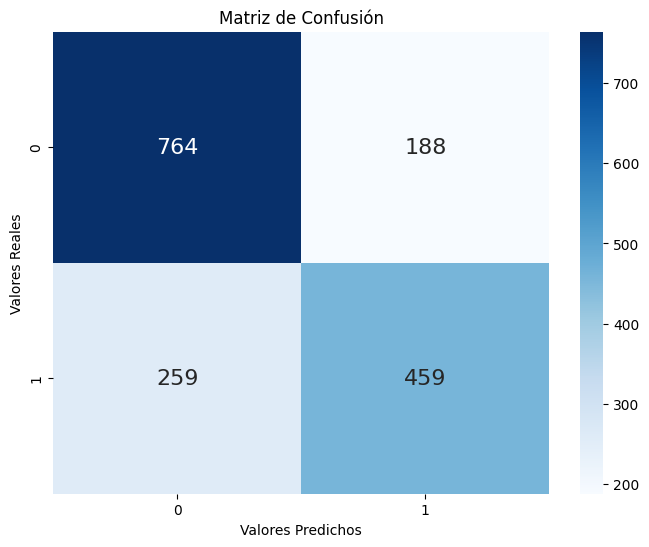

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Grafico de la matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16})
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

Los resultados obtenidos de la matriz de confusión fueron los siguientes:

Verdaderos Negativos (TN): 770
Falsos Positivos (FP): 188
Falsos Negativos (FN): 259
Verdaderos Positivos (TP): 459

La matriz de confusión es aceptable, pero es necesario evaluar otras métricas debido a la gran cantidad de FP y aún más de FN.

3) F1 - Score: métrica muy empleada que resume la Precisión (Precisión) y Sensibilidad (Recall) en una sola métrica.

In [46]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       952
         1.0       0.71      0.64      0.67       718

    accuracy                           0.73      1670
   macro avg       0.73      0.72      0.72      1670
weighted avg       0.73      0.73      0.73      1670



El F1-score promedio fue del 73%, lo cual indica un equilibrio razonable entre precisión y recall para las dos clases (match y not match). En el caso de la precisión, el modelo predice correctamente los "not match" en un 75% de los casos, mientras que lo hace en un 71% para los "match", lo cual podria mejorar. En el caso del recall, es del 80% para los "not match" lo cual es un valor alto, pero es bastante mas bajo para los "match" (64%).

**CONCLUSIÓN FINAL: el modelo es aceptable, pero tiene mayores dificultades para predecir los "match" respecto a los "not match". El modelo podría mejorarse teniendo en cuenta una mayor cantidad de características, incorporar nuevas características, o aumentar la cantidad de información.**